## Covid Report
Importing packages

In [5]:
import numpy as np
from matplotlib import pyplot as plt
import os 
import __future__
from scipy.integrate import odeint
import pandas as pd
from scipy.stats import linregress

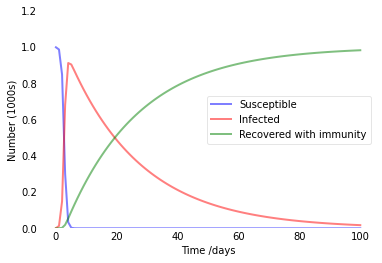

In [6]:
N = 1000
# Initial number of infected and recovered individuals, I0 and R0.
I0, R0 = 1, 0
# Everyone else, S0, is susceptible to infection initially.
S0 = N - I0 - R0
# Contact rate, beta, and mean recovery rate, gamma, (in 1/days).
beta, gamma = 2.6, 1/24 
# A grid of time points (in days)
t = np.linspace(0, 100, 100)

# The SIR model differential equations.
def deriv(y, t, N, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

# Initial conditions vector
y0 = S0, I0, R0
# Integrate the SIR equations over the time grid, t.
ret = odeint(deriv, y0, t, args=(N, beta, gamma))
S, I, R = ret.T

# Plot the data on three separate curves for S(t), I(t) and R(t)
fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111, axisbelow=True)
ax.plot(t, S/1000, 'b', alpha=0.5, lw=2, label='Susceptible')
ax.plot(t, I/1000, 'r', alpha=0.5, lw=2, label='Infected')
ax.plot(t, R/1000, 'g', alpha=0.5, lw=2, label='Recovered with immunity')
ax.set_xlabel('Time /days')
ax.set_ylabel('Number (1000s)')
ax.set_ylim(0,1.2)
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.show()

Let's See Current Trends
Start with world trends

In [7]:
w_df = pd.read_csv('global/time_series_covid_19_confirmed.csv',index_col=0)
w_df.head()

,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,...,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20
Province/State,,,,,,,,,,,,,,,,,,,,,
NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,0,...,840,906,933,996,1026,1092,1176,1279,1351,1463
NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,0,...,518,539,548,562,584,609,634,663,678,712
NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,0,...,2268,2418,2534,2629,2718,2811,2910,3007,3127,3256
NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,0,...,673,696,704,713,717,717,723,723,731,738
NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,0,...,19,19,24,24,24,24,25,25,25,25


In [8]:
w_df['Country/Region'].unique()


array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Benin', 'Bhutan', 'Bolivia',
       'Bosnia and Herzegovina', 'Brazil', 'Brunei', 'Bulgaria',
       'Burkina Faso', 'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Diamond Princess', 'Cuba', 'Cyprus',
       'Czechia', 'Denmark', 'Djibouti', 'Dominican Republic', 'Ecuador',
       'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon',
       'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Guatemala',
       'Guinea', 'Guyana', 'Haiti', 'Holy See', 'Honduras', 'Hungary',
       'Iceland', 'India

In [9]:
print(len(w_df['Country/Region'].unique()))

185


In [10]:
agg_deaths = list(w_df.iloc[:,3:].sum())
print(agg_deaths)

[555, 654, 941, 1434, 2118, 2927, 5578, 6166, 8234, 9927, 12038, 16787, 19881, 23892, 27635, 30794, 34391, 37120, 40150, 42762, 44802, 45221, 60368, 66885, 69030, 71224, 73258, 75136, 75639, 76197, 76819, 78572, 78958, 79561, 80406, 81388, 82746, 84112, 86011, 88369, 90306, 92840, 95120, 97886, 101801, 105847, 109821, 113590, 118620, 125875, 128352, 145205, 156101, 167454, 181574, 197102, 214821, 242570, 272208, 304507, 336953, 378231, 418041, 467653, 529591, 593291, 660693, 720140, 782389, 857487, 932475, 1013326, 1095698, 1175857, 1249484, 1321131, 1396092, 1479804, 1565278, 1657526, 1735650, 1834721, 1904838, 1975195, 2055057, 2151421, 2239144, 2316716, 2400078, 2471247, 2548091, 2623049, 2707728, 2809499, 2896744]


In [11]:
headers = w_df.columns.values.tolist() #optimal performance
dates = headers[3:]
print(dates)


['1/22/20', '1/23/20', '1/24/20', '1/25/20', '1/26/20', '1/27/20', '1/28/20', '1/29/20', '1/30/20', '1/31/20', '2/1/20', '2/2/20', '2/3/20', '2/4/20', '2/5/20', '2/6/20', '2/7/20', '2/8/20', '2/9/20', '2/10/20', '2/11/20', '2/12/20', '2/13/20', '2/14/20', '2/15/20', '2/16/20', '2/17/20', '2/18/20', '2/19/20', '2/20/20', '2/21/20', '2/22/20', '2/23/20', '2/24/20', '2/25/20', '2/26/20', '2/27/20', '2/28/20', '2/29/20', '3/1/20', '3/2/20', '3/3/20', '3/4/20', '3/5/20', '3/6/20', '3/7/20', '3/8/20', '3/9/20', '3/10/20', '3/11/20', '3/12/20', '3/13/20', '3/14/20', '3/15/20', '3/16/20', '3/17/20', '3/18/20', '3/19/20', '3/20/20', '3/21/20', '3/22/20', '3/23/20', '3/24/20', '3/25/20', '3/26/20', '3/27/20', '3/28/20', '3/29/20', '3/30/20', '3/31/20', '4/1/20', '4/2/20', '4/3/20', '4/4/20', '4/5/20', '4/6/20', '4/7/20', '4/8/20', '4/9/20', '4/10/20', '4/11/20', '4/12/20', '4/13/20', '4/14/20', '4/15/20', '4/16/20', '4/17/20', '4/18/20', '4/19/20', '4/20/20', '4/21/20', '4/22/20', '4/23/20', '4/

In [12]:
%matplotlib inline


In [13]:
from datetime import datetime
#making the x axis readable
dates_list = [datetime.strptime(date, '%m/%d/%y').date() for date in dates]
delta_days = []
for i in range(len(dates_list)):
    x = dates_list[i]-dates_list[0]
    delta_days.append(x.days)

Basic Projections?

In [14]:
avg_rise = pd.DataFrame(agg_deaths).diff()
print(avg_rise.sum()/len(avg_rise))
#average rise of 30,486 cases per day globally with a mix of alpha changes (restrictions of movement)

0    30486.2
dtype: float64


Korea Model (Praised by the WHO and such)


In [15]:
k_df = pd.read_csv('skorea/Time.csv')

In [16]:
k_df.head()


,date,time,test,negative,confirmed,released,deceased
0,2020-01-20,16,1,0,1,0,0
1,2020-01-21,16,1,0,1,0,0
2,2020-01-22,16,4,3,1,0,0
3,2020-01-23,16,22,21,1,0,0
4,2020-01-24,16,27,25,2,0,0


In [17]:
k_df.dtypes

date         object
time          int64
test          int64
negative      int64
confirmed     int64
released      int64
deceased      int64
dtype: object

In [18]:
sk_date = list(k_df.iloc[:,0])
sk_date_processed = [datetime.strptime(date, '%Y-%m-%d').date() for date in sk_date]


In [19]:
delta_days_korea = []
for i in range(len(sk_date)):
    x = sk_date_processed[i]- sk_date_processed[0]
    delta_days_korea.append(x.days)
print(delta_days_korea)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91]


Text(0.5, 1.0, 'South Korea')

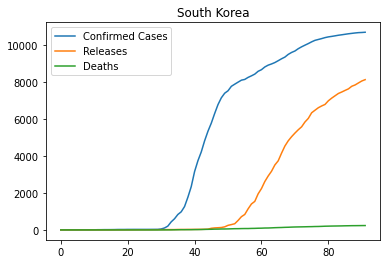

In [20]:

fig = plt.figure()
ax = plt.subplot(111)
ax.plot(delta_days_korea,k_df.iloc[:,4], label='Confirmed Cases')
ax.plot(delta_days_korea,k_df.iloc[:,5], label='Releases')
ax.plot(delta_days_korea,k_df.iloc[:,6], label='Deaths')
ax.legend()
plt.title('South Korea')

In [21]:
wd_df = pd.read_csv('global/time_series_covid_19_deaths.csv',index_col=0)
wd_rf = pd.read_csv('global/time_series_covid_19_recovered.csv',index_col=0)

In [22]:
wd_df.head()

,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,...,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20
Province/State,,,,,,,,,,,,,,,,,,,,,
NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,0,...,30,30,30,33,36,36,40,42,43,47
NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,0,...,26,26,26,26,26,26,27,27,27,27
NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,0,...,348,364,367,375,384,392,402,407,415,419
NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,0,...,33,35,35,36,37,37,37,37,40,40
NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2


In [23]:
wd_rf.head()

,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,...,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20
Province/State,,,,,,,,,,,,,,,,,,,,,
NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,0,...,54,99,112,131,135,150,166,179,188,188
NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,0,...,277,283,302,314,327,345,356,385,394,403
NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,0,...,783,846,894,1047,1099,1152,1204,1355,1408,1479
NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,0,...,169,191,205,235,248,282,309,333,344,344
NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,0,...,5,5,6,6,6,6,6,6,6,6


In [24]:
 ag_deaths =list(wd_df.iloc[:,3:].sum())

In [25]:
ag_releases = list(wd_rf.iloc[:,3:].sum())

Text(0.5, 1.0, 'Global Data')

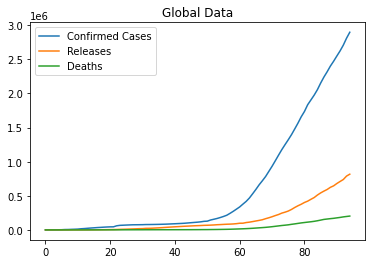

In [26]:
fig = plt.figure()
ax = plt.subplot(111)
ax.plot(delta_days,agg_deaths, label='Confirmed Cases')
ax.plot(delta_days,ag_releases, label='Releases')
ax.plot(delta_days,ag_deaths, label='Deaths')

ax.legend()
plt.title('Global Data')

In [27]:
linregress(delta_days,agg_deaths)

LinregressResult(slope=25966.16643337067, intercept=-608192.938157895, rvalue=0.8430940042491097, pvalue=8.590351937262544e-27, stderr=1717.4490978346594)

In [28]:
linregress(delta_days_korea,k_df.iloc[:,4])

LinregressResult(slope=159.95494967865244, intercept=-2243.7545582047733, rvalue=0.9499970136112131, pvalue=2.829610586812131e-47, stderr=5.542033330785413)

In [29]:
linregress(agg_deaths,ag_deaths)

LinregressResult(slope=0.06797760078535389, intercept=-4620.561264705866, rvalue=0.9955531614595385, pvalue=3.2044802405516497e-97, stderr=0.0006669867918086953)

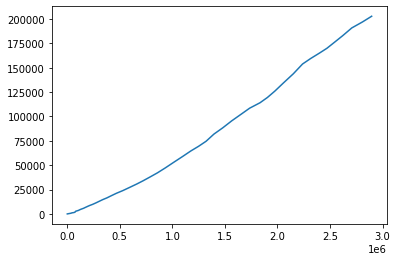

In [30]:
plt.plot(agg_deaths,ag_deaths)

In [31]:
ds = pd.read_csv('india/covid_19_india.csv',index_col=0)

In [32]:
ds.head()

,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
Sno,,,,,,,,
1,30/01/20,6:00 PM,Kerala,1,0,0,0,1
2,31/01/20,6:00 PM,Kerala,1,0,0,0,1
3,01/02/20,6:00 PM,Kerala,2,0,0,0,2
4,02/02/20,6:00 PM,Kerala,3,0,0,0,3
5,03/02/20,6:00 PM,Kerala,3,0,0,0,3


In [33]:

ds['Date'] = ds['Date'].apply(pd.to_datetime, dayfirst=True)
ds = ds.groupby(["Date"]).sum()

In [34]:
ind_test_df = pd.read_csv('india/india_test.csv',index_col=0)
ind_test_df["TotalSamplesTested"] = ind_test_df["TotalSamplesTested"].fillna(0)

In [35]:
ind_test_df['TotalSamplesTestedCummulative']=ind_test_df['TotalSamplesTested'].cumsum()

In [36]:
ind_test_df.iloc[:,0:]

,DateTime,TotalSamplesTested,TotalIndividualsTested,TotalPositiveCases,Source,TotalSamplesTestedCummulative
SNo,,,,,,
1,13/03/20 18:00,6500.0,5900.0,78.0,Press_Release_ICMR_13March2020.pdf,6500.0
2,18/03/20 18:00,13125.0,12235.0,150.0,ICMR_website_update_18March_6PM_IST.pdf,19625.0
3,19/03/20 18:00,14175.0,13285.0,182.0,ICMR_website_update_19March_6PM_IST.pdf,33800.0
4,20/03/20 18:00,15404.0,14514.0,236.0,ICMR_website_update_20March_6PM_IST.pdf,49204.0
5,21/03/20 18:00,16911.0,16021.0,315.0,ICMR_website_update_21March_6PM_IST.pdf,66115.0
6,22/03/20 18:00,18127.0,17237.0,396.0,ICMR_website_update_22March_6PM_IST.pdf,84242.0
7,23/03/20 20:00,20707.0,19817.0,471.0,ICMR_website_update_23March_8PM_IST.pdf,104949.0
8,24/03/20 20:00,22694.0,21804.0,536.0,ICMR_website_update_24March_8PM_IST.pdf,127643.0
9,25/03/20 20:00,25144.0,24254.0,581.0,ICMR_website_update_25March_8PM_IST.pdf,152787.0


Text(0.5, 1.0, 'India')

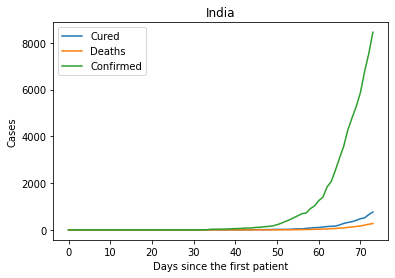

In [37]:
fig = plt.figure()
ax = plt.subplot(111)
ax.plot(delta_days[:74],ds['Cured'],label='Cured')
ax.plot(delta_days[:74],ds['Deaths'],label='Deaths')
ax.plot(delta_days[:74],ds['Confirmed'],label='Confirmed')

plt.xlabel('Days since the first patient')
plt.ylabel('Cases')
ax.legend()
plt.title('India')

Text(0.5, 0, 'Days of testing (not continuous)')

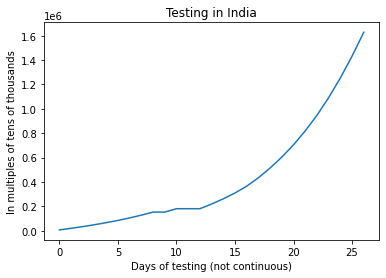

In [38]:
plt.plot(delta_days[:27],ind_test_df['TotalSamplesTestedCummulative'])
plt.title('Testing in India')
plt.ylabel('In multiples of tens of thousands')
plt.xlabel('Days of testing (not continuous)')


US Scenario

In [39]:
us_df =pd.read_csv('global/time_series_covid_19_confirmed_US.csv',index_col=0)
us_d_df =pd.read_csv('global/time_series_covid_19_deaths_US.csv',index_col=0)

In [40]:
us_d_df.head()

,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,...,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20
UID,,,,,,,,,,,,,,,,,,,,,
16.0,AS,ASM,16,60.0,NaN,American Samoa,US,-14.2710,-170.1320,"American Samoa, US",...,0,0,0,0,0,0,0,0,0,0
316.0,GU,GUM,316,66.0,NaN,Guam,US,13.4443,144.7937,"Guam, US",...,5,5,5,5,5,5,5,5,5,5
580.0,MP,MNP,580,69.0,NaN,Northern Mariana Islands,US,15.0979,145.6739,"Northern Mariana Islands, US",...,2,2,2,2,2,2,2,2,2,2
630.0,PR,PRI,630,72.0,NaN,Puerto Rico,US,18.2208,-66.5901,"Puerto Rico, US",...,56,58,60,62,63,64,63,69,77,83
850.0,VI,VIR,850,78.0,NaN,Virgin Islands,US,18.3358,-64.8963,"Virgin Islands, US",...,1,2,3,3,3,3,3,3,3,3


In [41]:
conf_us =us_df.iloc[:,10:].sum()
confd_us =us_d_df.iloc[:,11:].sum()


In [42]:
#cheat sheet
delta_day = list(range(1,100))  

Text(0, 0.5, 'cases')

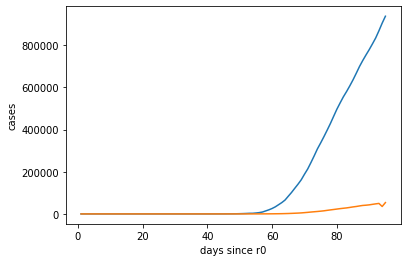

In [43]:
fig = plt.figure()
ax = plt.subplot(111)
ax.plot(delta_day[:95],conf_us,label="confirmed")
ax.plot(delta_day[:95],confd_us,label='deaths')
plt.xlabel('days since r0')
plt.ylabel('cases')


In [44]:
ind_age_df = pd.read_csv('india/age.csv',index_col=0)

In [45]:
ind_age_df.head()

,AgeGroup,TotalCases,Percentage
Sno,,,
1,0-9,22,3.18%
2,10-19,27,3.90%
3,20-29,172,24.86%
4,30-39,146,21.10%
5,40-49,112,16.18%


In [46]:
ind_age_df.drop(ind_age_df.index[9])

,AgeGroup,TotalCases,Percentage
Sno,,,
1,0-9,22,3.18%
2,10-19,27,3.90%
3,20-29,172,24.86%
4,30-39,146,21.10%
5,40-49,112,16.18%
6,50-59,77,11.13%
7,60-69,89,12.86%
8,70-79,28,4.05%
9,>=80,10,1.45%


<BarContainer object of 10 artists>

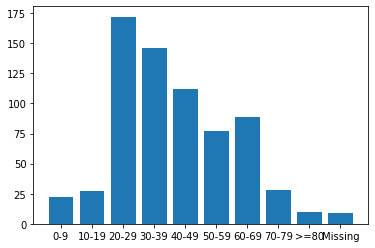

In [47]:
plt.bar(ind_age_df['AgeGroup'],ind_age_df['TotalCases'])

In [50]:
from fbprophet import Prophet
from fbprophet.plot import plot_plotly

In [51]:
train_dataset= pd.DataFrame()
train_dataset['ds'] = dates_list[:74]
train_dataset['y']= list(ds['Confirmed'])
prophet_basic = Prophet()
prophet_basic.fit(train_dataset)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [52]:
future= prophet_basic.make_future_dataframe(periods=300)
future.tail(2)

,ds
372,2021-01-28
373,2021-01-29


In [53]:
forecast=prophet_basic.predict(future)

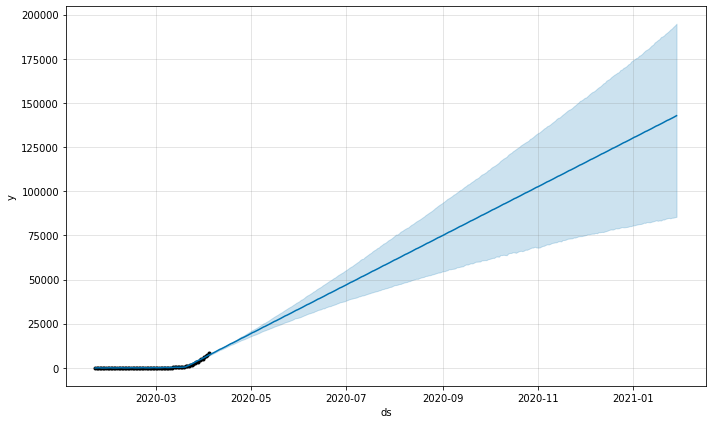

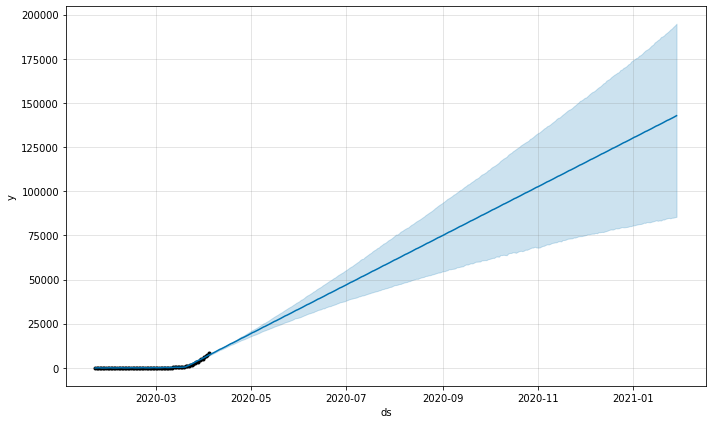

In [54]:
prophet_basic.plot(forecast)

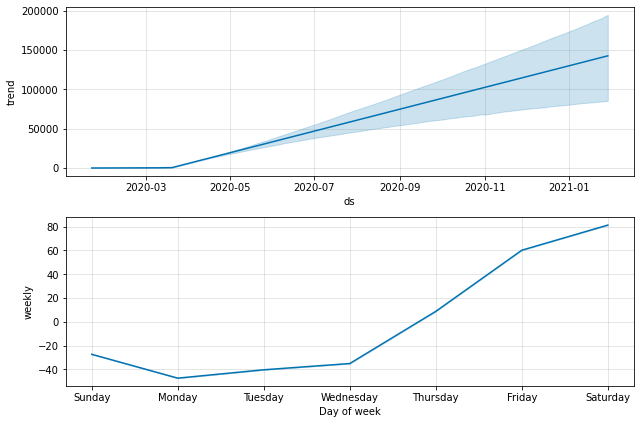

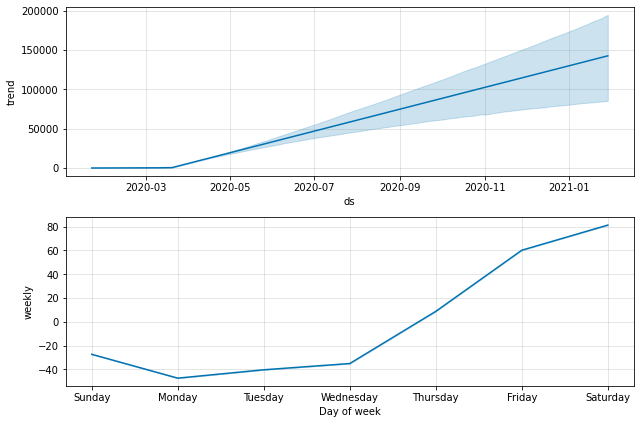

In [55]:
prophet_basic.plot_components(forecast)

In [56]:
len(dates_list[:92])

92

In [57]:
train_dataset2= pd.DataFrame()
train_dataset2['ds'] = dates_list[:92]
train_dataset2['y']= list(k_df.iloc[:,4])
prophet_basic2 = Prophet()
prophet_basic2.fit(train_dataset2)


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [58]:
future= prophet_basic2.make_future_dataframe(periods=300)
future.tail(2)

,ds
390,2021-02-15
391,2021-02-16


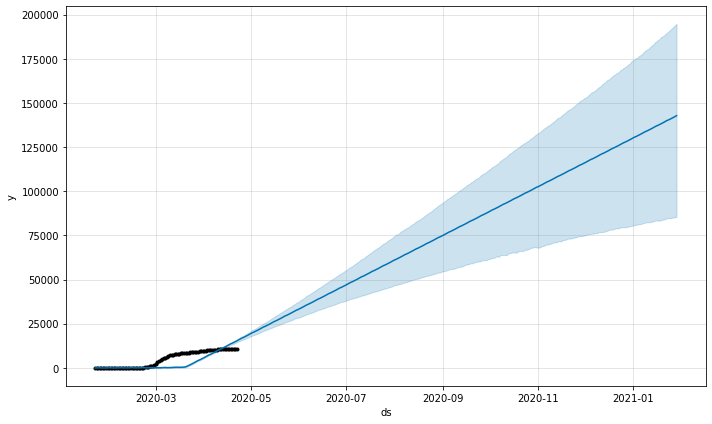

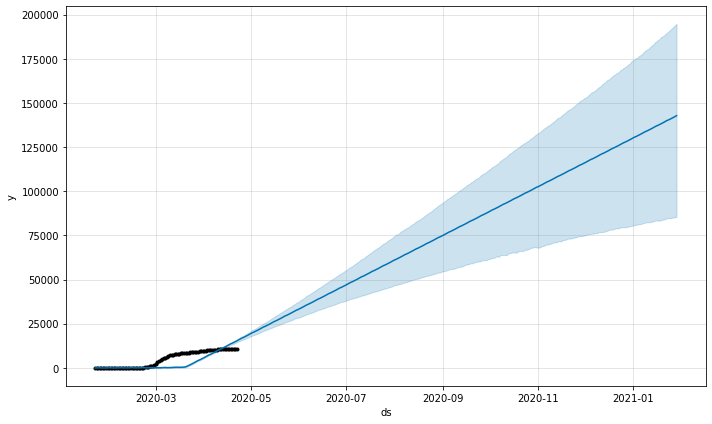

In [59]:
prophet_basic2.plot(forecast)

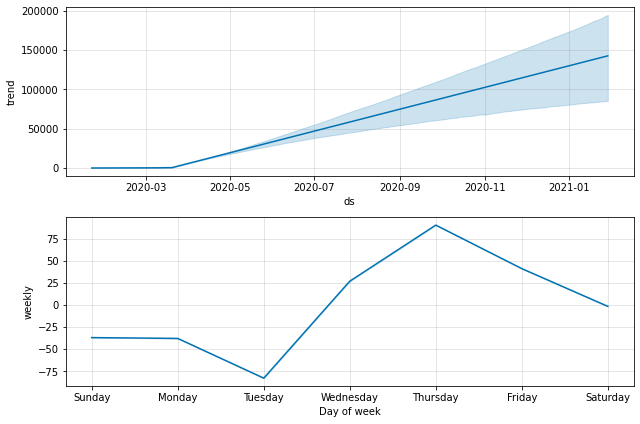

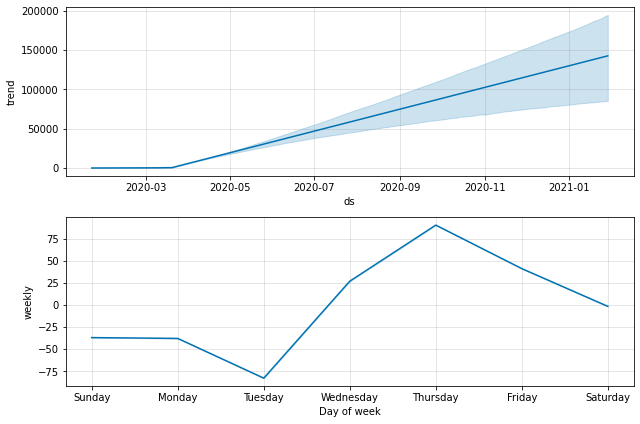

In [60]:
prophet_basic2.plot_components(forecast)

In [63]:
pd.DataFrame(agg_deaths).diff()

,0
0,NaN
1,99.0
2,287.0
3,493.0
4,684.0
...,...
90,76844.0
91,74958.0
92,84679.0
93,101771.0


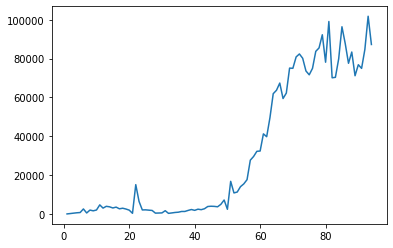

In [68]:
plt.plot(delta_days,pd.DataFrame(agg_deaths).diff())